In [1]:
print("Hello world")

Hello world


## Importing our packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")


## Reading the data

In [4]:
diamonds_xl = pd.read_excel("PricingOfDiamonds.xlsx") # when reading from the samer dir
# diamonds_xl = pd.read_excel("D:\\Github\\Joseph\\Pricing of Diamonds") # reading from different dirz
# diamonds_xl = pd.read_excel("D:/Github/Joseph/Pricing of Diamonds")
diamonds_xl = pd.read_csv("pricingOfDiamonds.csv")

In [5]:
diamonds_xl.head(10)

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative
5,6,0.24,Very Good,J,VVS2,62.8,336,1400.000000,5.350318,SP,Negative
6,7,0.24,Very Good,I,VVS1,62.3,336,1400.000000,5.393258,SN,Negative
7,8,0.26,Very Good,H,SI1,61.9,337,1296.153846,5.444265,SN,Negative
8,9,0.22,Fair,E,VS2,65.1,337,1531.818182,5.176651,Negative,Negative
9,10,0.23,Very Good,H,VS1,59.4,338,1469.565217,5.690236,Negative,Negative


## Dealing with missing values
- Checking for missing values

In [6]:
# missing_values = diamonds_xl.isnull().any()
missing_values = diamonds_xl.isnull().sum()
missing_values

ID          0
carat       0
cut         0
colour      0
clarity     0
depth       0
price       0
x           0
y           0
P          10
PC         10
dtype: int64

<Axes: >

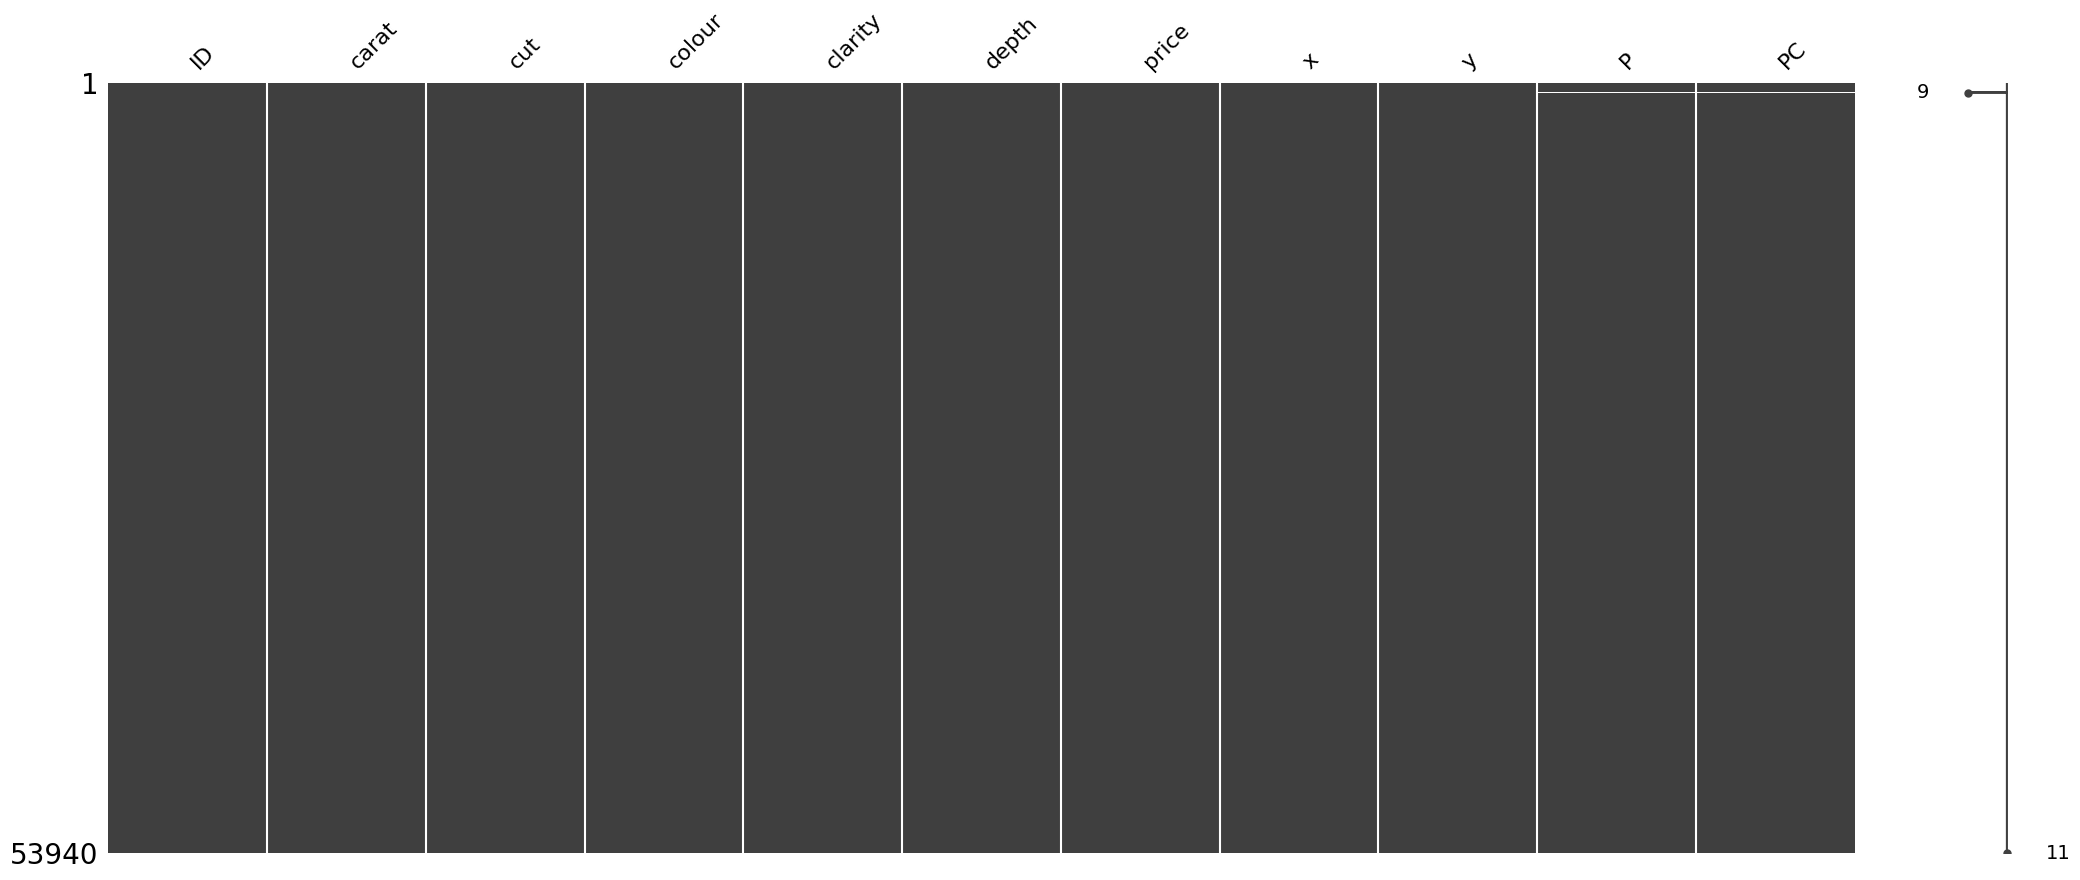

In [7]:
msno.matrix(diamonds_xl)

- i removed ID because its just an auto-incrementing field

In [14]:
diamonds_xl = diamonds_xl.drop(columns=["ID"])

### Removing missing values
- Dropping
- imputation(mean, mode, median)

In [6]:
## getting all continuous variables
# continuous variables, are suitable for numerical analysis and statistical operations, usually don't belong to the object dtype.
cont_cols = diamonds_xl.select_dtypes(exclude="object")
# cont_cols = diamonds_xl.select_dtypes(include=["int64", "float64"])
cont_cols

,ID,carat,depth,price,x,y
0,1,0.23,61.5,326,1417.391304,5.300813
1,2,0.21,59.8,326,1552.380952,5.451505
2,3,0.23,56.9,327,1421.739130,5.746924
3,4,0.29,62.4,334,1151.724138,5.352564
4,5,0.31,63.3,335,1080.645161,5.292259
...,...,...,...,...,...,...
53935,53936,0.72,60.8,2757,3829.166667,45.345395
53936,53937,0.72,63.1,2757,3829.166667,43.692552
53937,53938,0.70,62.8,2757,3938.571429,43.901274
53938,53939,0.86,61.0,2757,3205.813953,45.196721


- visialization of cont columns

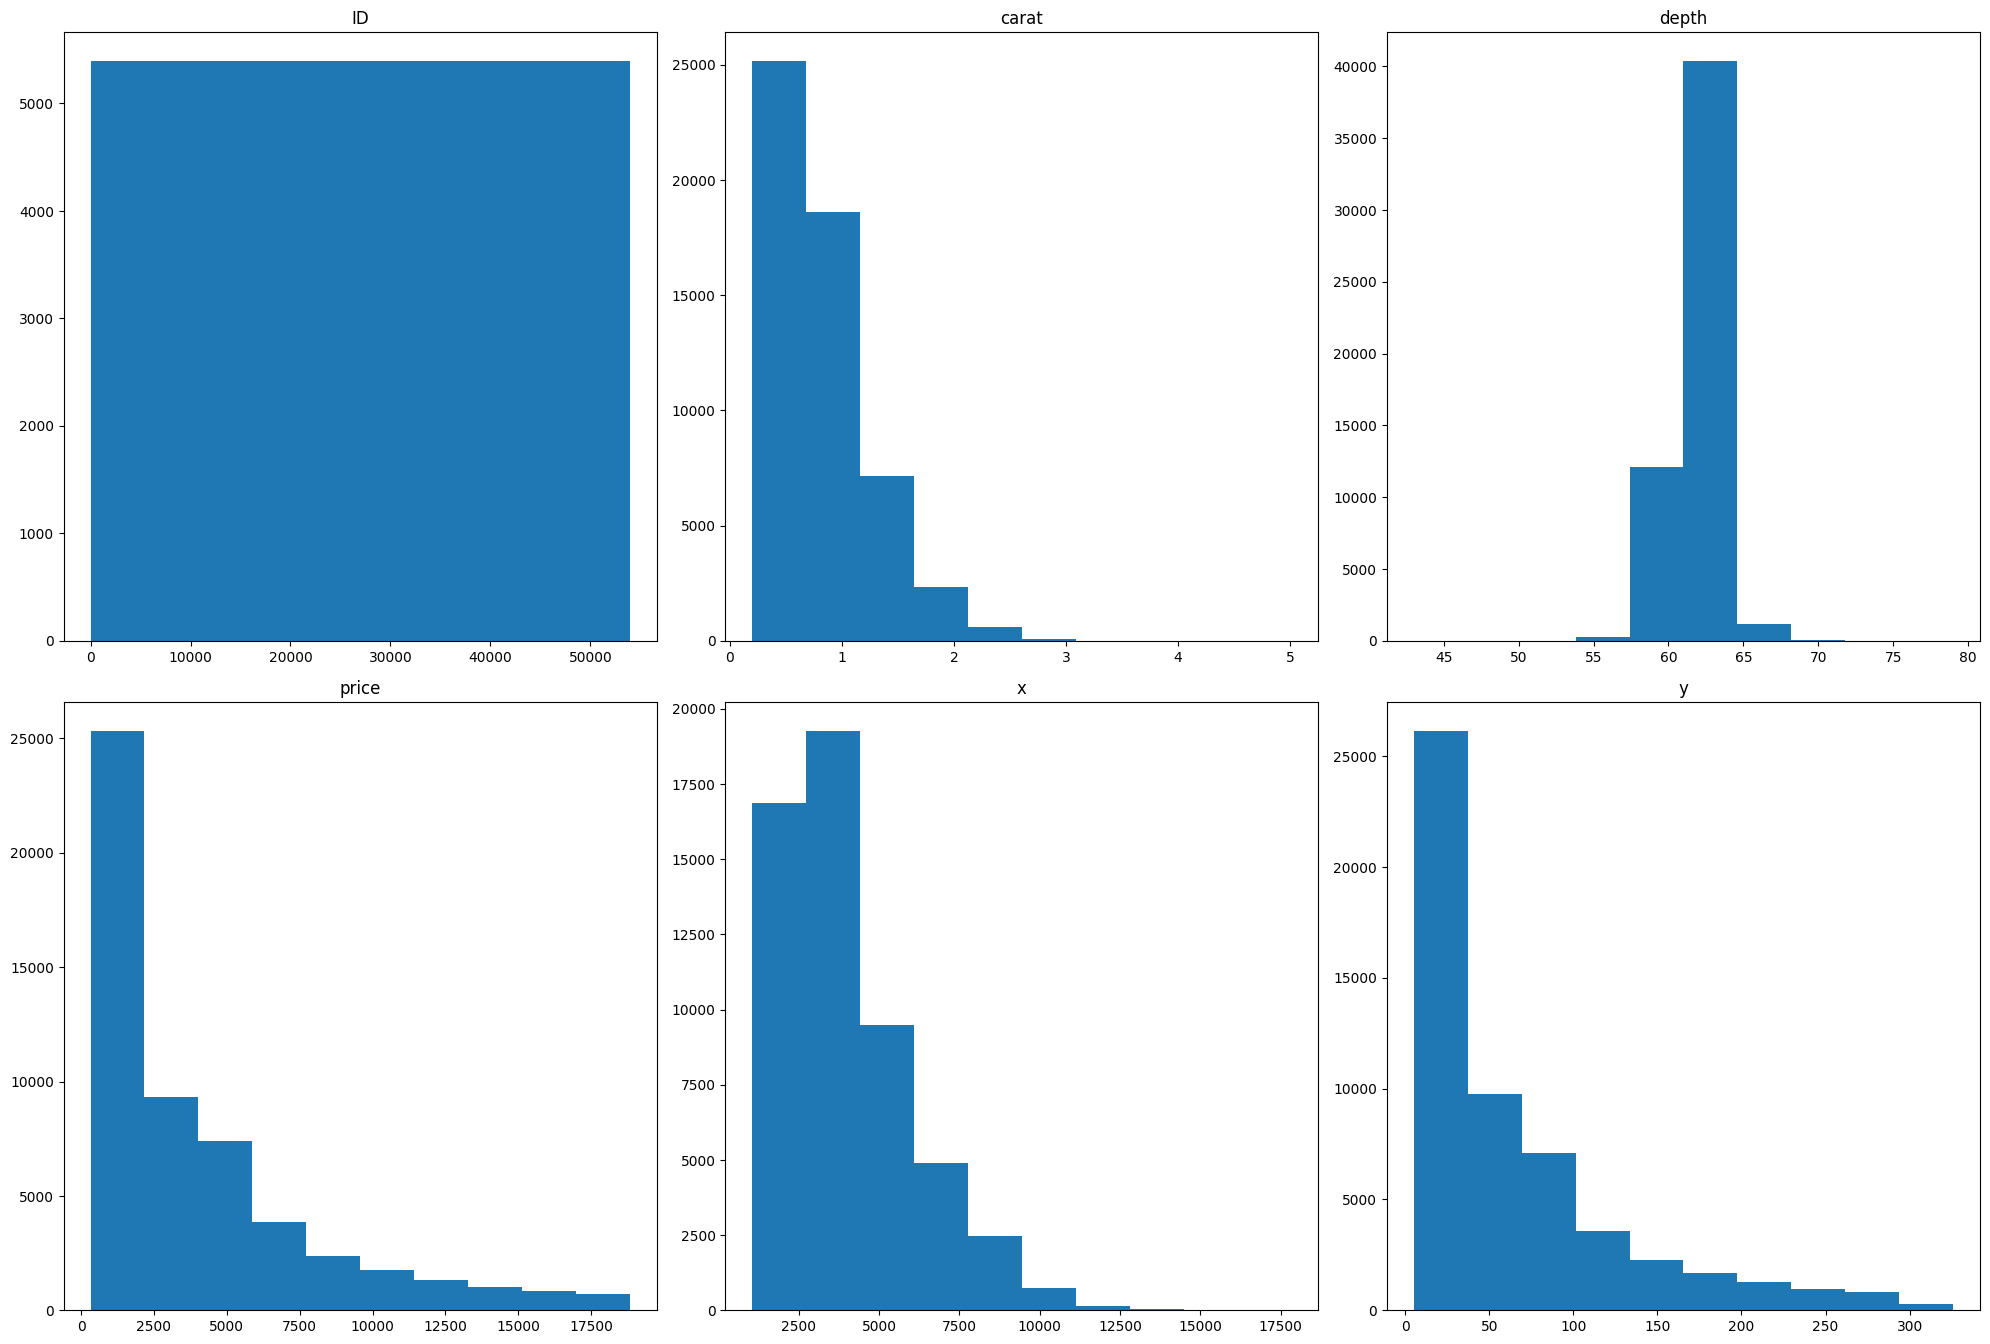

In [8]:
plt.figure(figsize=(20,20))  # Create a figure for plotting
for i,col in enumerate(cont_cols.columns): # Loop through each column in cont_cols and create subplots for histograms
    plt.subplot(3,3, i+1)  # Create a subplot at position (i + 1) in a 3x3 grid
    plt.hist(diamonds_xl[col]) # Create a histogram for the current column
    plt.title(col)# Set the title of the subplot to the column name
plt.tight_layout() # Adjust layout to prevent overlapping elements
plt.show() # Display the plot

In [17]:
##  for skwed data 
diamonds_xl["carat"] = diamonds_xl["carat"].fillna(diamonds_xl["carat"].median())
##  for normalized data 
diamonds_xl["depth"] = diamonds_xl["depth"].fillna(diamonds_xl["depth"].mean())


In [18]:
diamonds_xl["P"] = diamonds_xl["P"].fillna(diamonds_xl["P"].mode()[0])
diamonds_xl["PC"] = diamonds_xl["PC"].fillna(diamonds_xl["PC"].mode()[0])

- cross checking for any missing values left!

In [19]:
missing_values = diamonds_xl.isnull().sum()
missing_values

carat      0
cut        0
colour     0
clarity    0
depth      0
price      0
x          0
y          0
P          0
PC         0
dtype: int64

## Outliers

- checking for outliers

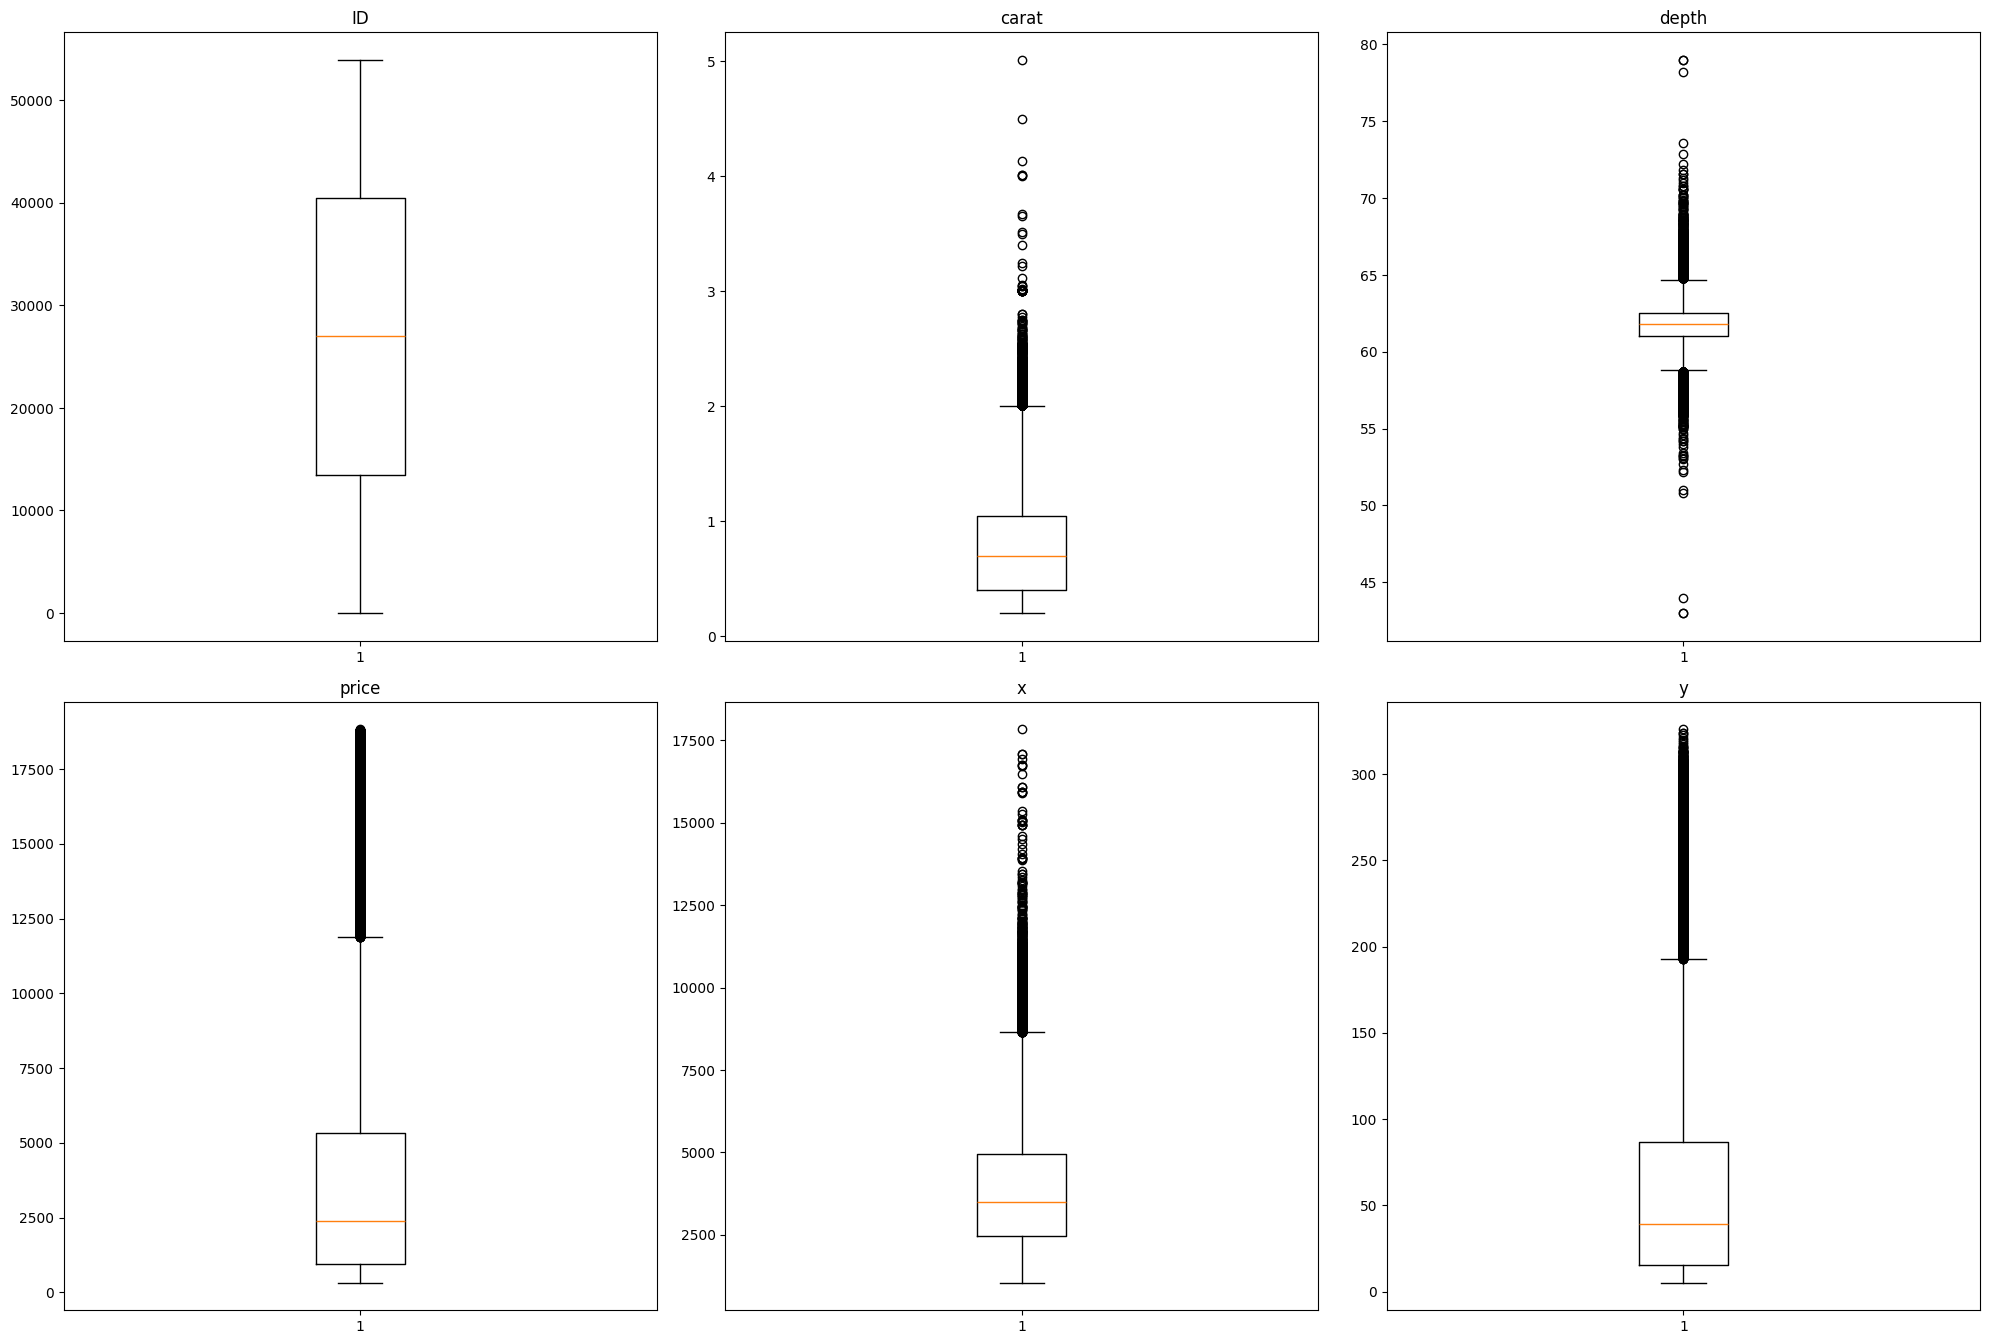

In [9]:
def box_plotting(cont_cols):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(cont_cols.columns):
        plt.subplot(3,3, i+1)
        plt.boxplot(diamonds_xl[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

box_plotting(cont_cols)

- removing outliers using IQR

In [10]:
def removing_outliers(columns):
    for i in columns:

        lower_quantile = diamonds_xl[i].quantile(.25)
        upper_quantile = diamonds_xl[i].quantile(.75)

        IQR  = upper_quantile-lower_quantile

        upper_boundary = upper_quantile + 1.5 * IQR
        lower_boundary = lower_quantile - 1.5 * IQR

        diamonds_xl[i] = np.where(diamonds_xl[i]>upper_boundary, upper_boundary, diamonds_xl[i])
        diamonds_xl[i] = np.where(diamonds_xl[i]<lower_boundary, lower_boundary, diamonds_xl[i])

In [11]:
removing_outliers(cont_cols.columns)

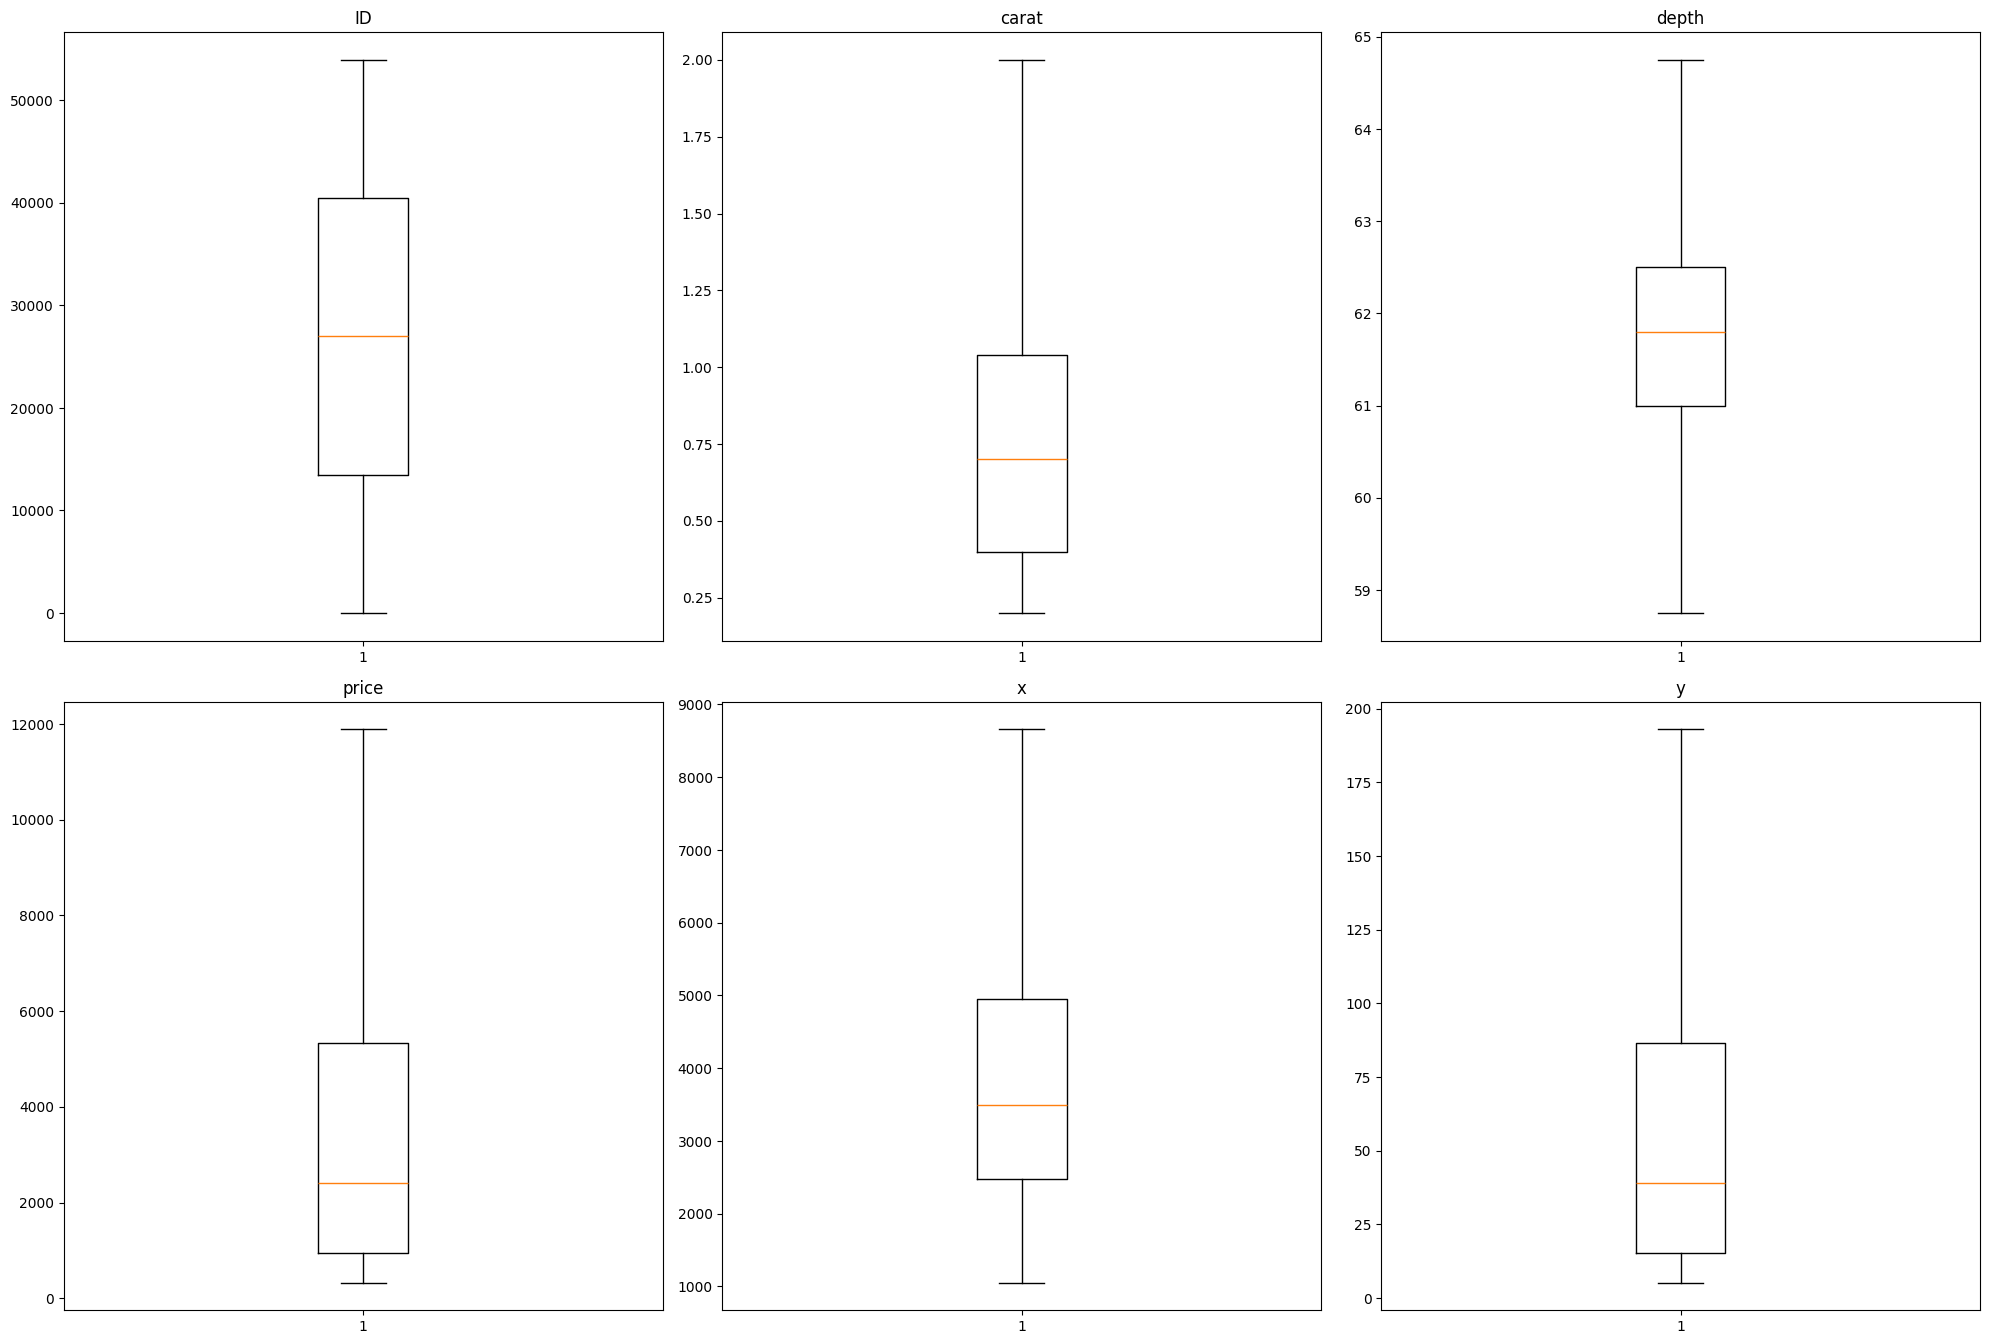

In [12]:
box_plotting(cont_cols)

In [13]:
diamonds_xl.head()

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1.0,0.23,Ideal,E,SI2,61.50,326.0,1417.391304,5.300813,Negative,Negative
1,2.0,0.21,Premium,E,SI1,59.80,326.0,1552.380952,5.451505,Positive,Negative
2,3.0,0.23,Good,E,VS1,58.75,327.0,1421.739130,5.746924,Positve,Negative
3,4.0,0.29,Premium,I,VS2,62.40,334.0,1151.724138,5.352564,NR,Negative
4,5.0,0.31,Good,J,SI2,63.30,335.0,1080.645161,5.292259,NR,Negative


## Relationships (target = price)
- Cont to Cont

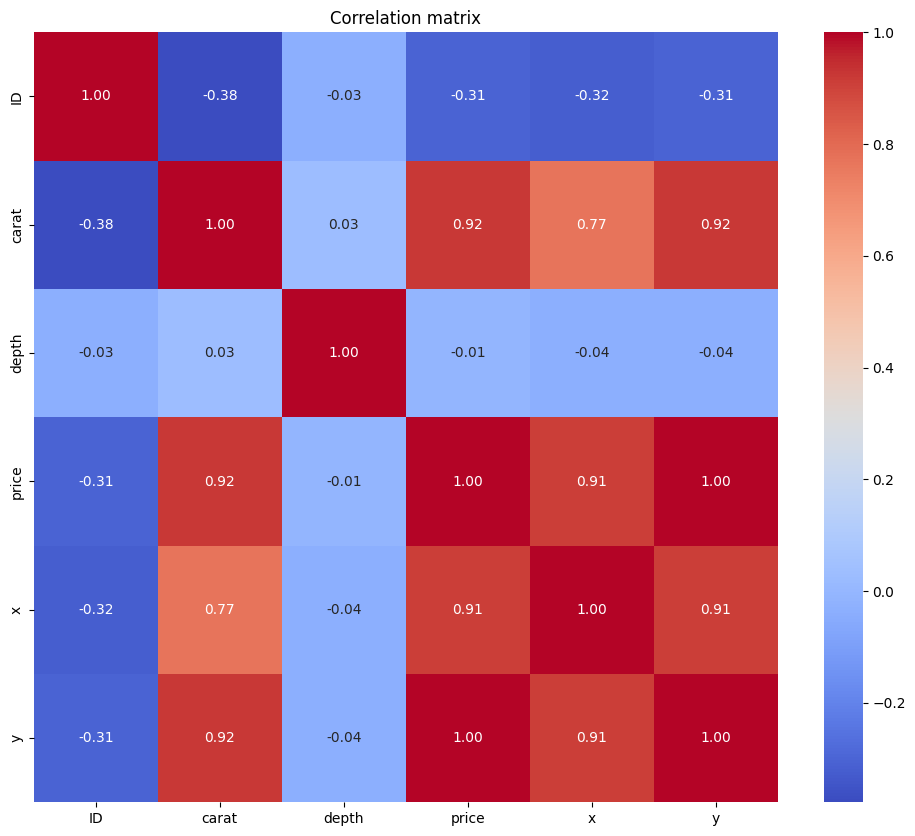

In [14]:
corr_matrix = cont_cols.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm' , fmt = ".2f")
plt.title("Correlation matrix")
plt.show()

<Axes: xlabel='carat', ylabel='price'>

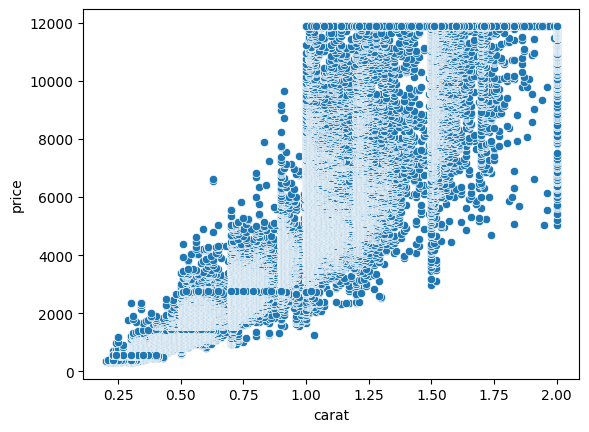

In [15]:
sns.scatterplot(diamonds_xl, x = "carat", y = "price")

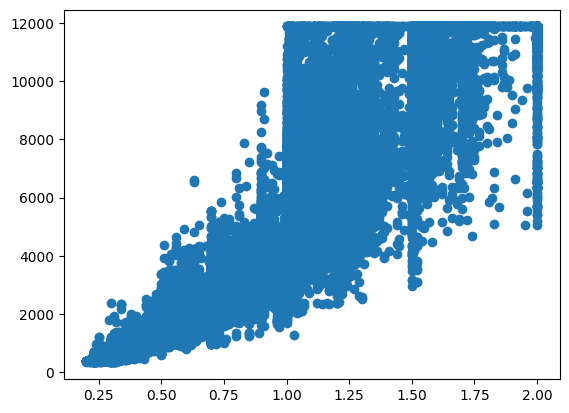

In [16]:
plt.scatter(x = diamonds_xl["carat"], y =  diamonds_xl["price"])

- the correlated predictors in cont are [carat, x, y]

 Cont to Cat

In [27]:
def combined_boxplots(data, var1, var2):
    sns.boxplot(x = data[var1], y = data[var2])
    plt.xlabel(f"{var1}")
    plt.ylabel(f"{var2}")
    plt.title(f"Boxplot for {var1} vs. {var2}")
    plt.show()

def AnovaTest(data, cont_var, cat_var):
    group_data = [
        group[cont_var].values for _, group in data.groupby(cat_var)
    ]
    f_statistics, p_value = f_oneway(*group_data)
    if p_value > 0.05:
        print(f"{cat_var} is not correlated with {cont_var}")
    elif p_value < 0.05:
        print(f"{cat_var} is correlated with {cont_var}")

- grouping for cat columns

In [28]:
cat_cols = diamonds_xl.select_dtypes(include = ["object"]).columns
cat_cols

Index(['cut', 'colour', 'clarity', 'P', 'PC'], dtype='object')

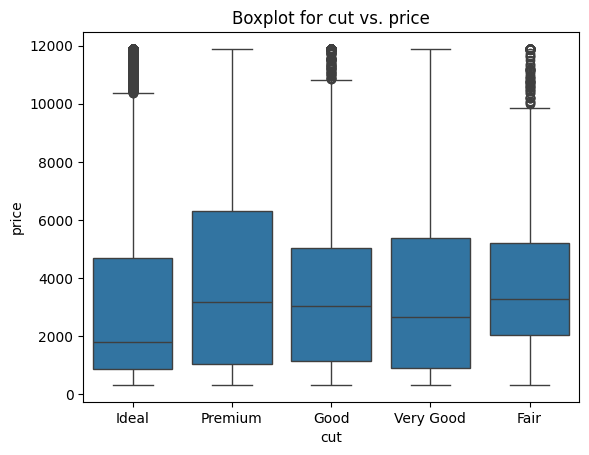

cut is correlated with price


<Figure size 640x480 with 0 Axes>

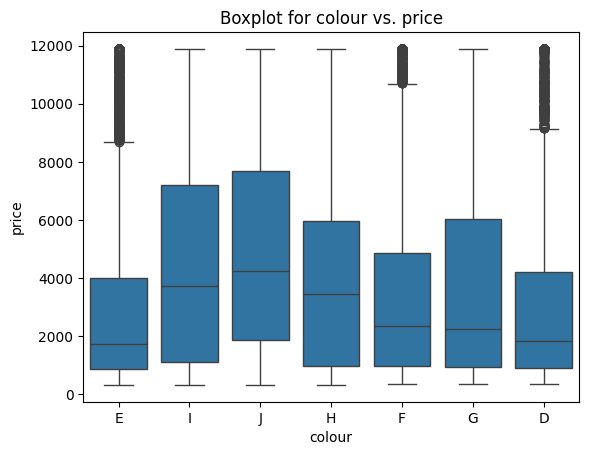

colour is correlated with price


<Figure size 640x480 with 0 Axes>

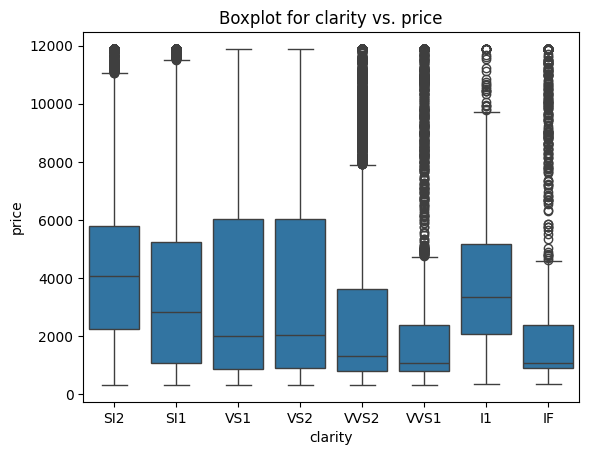

clarity is correlated with price


<Figure size 640x480 with 0 Axes>

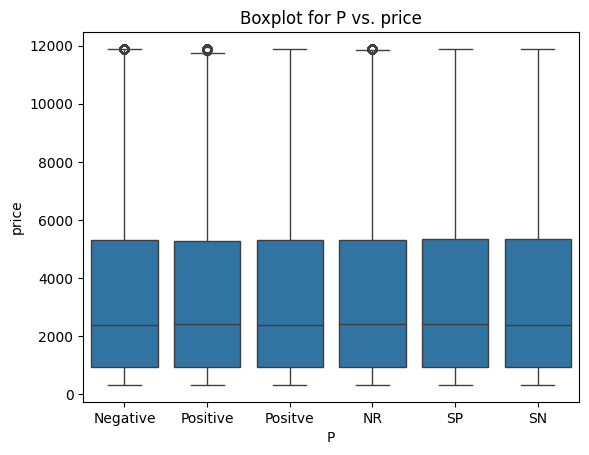

P is not correlated with price


<Figure size 640x480 with 0 Axes>

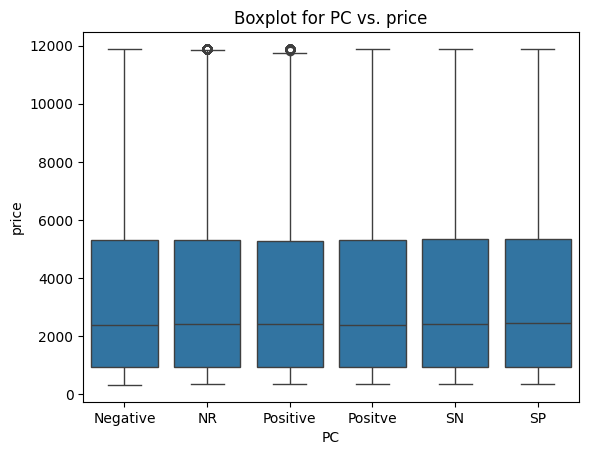

PC is not correlated with price


<Figure size 640x480 with 0 Axes>

In [24]:
for i in cat_cols:
    combined_boxplots(diamonds_xl, i, "price")
    AnovaTest(diamonds_xl, "price", i)
    plt.tight_layout()
    plt.show()

- categorical values [cut, color, clarity]

In [29]:
diamonds_xl.columns

Index(['carat', 'cut', 'colour', 'clarity', 'depth', 'price', 'x', 'y', 'P',
       'PC'],
      dtype='object')

In [30]:
predictors = diamonds_xl[["cut", "colour", "clarity", "carat", "x", "y"]]
predictors.head()

,cut,colour,clarity,carat,x,y
0,Ideal,E,SI2,0.23,1417.391304,5.300813
1,Premium,E,SI1,0.21,1552.380952,5.451505
2,Good,E,VS1,0.23,1421.739130,5.746924
3,Premium,I,VS2,0.29,1151.724138,5.352564
4,Good,J,SI2,0.31,1080.645161,5.292259


### Coverting the cat data to cont


In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
Label_encorder = LabelEncoder()
predictors["cut"] = Label_encorder.fit_transform(predictors["cut"])
predictors["colour"] = Label_encorder.fit_transform(predictors["colour"])
predictors["clarity"] = Label_encorder.fit_transform(predictors["clarity"])

In [32]:
predictors.head()

,cut,colour,clarity,carat,x,y
0,2,1,3,0.23,1417.391304,5.300813
1,3,1,2,0.21,1552.380952,5.451505
2,1,1,4,0.23,1421.739130,5.746924
3,3,5,5,0.29,1151.724138,5.352564
4,1,6,3,0.31,1080.645161,5.292259


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

## assigning predictors and target variables
X, y = predictors, diamonds_xl["price"]

##  splitting the trainging and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

## creating a model 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#predicting the test set
y_pred = linear_model.predict(X_test)

## Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Accuracy: {r2}\n Mean Square Error : {mse}\n Mean Square log error : {msle}")

NameError: name 'predictors' is not defined

In [2]:
## creating a model 
knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X_train, y_train)

#predicting the test set
y_pred = knn_model.predict(X_test)

## Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Accuracy: {r2}\n Mean Square Error : {mse}\n Mean Square log error : {msle}")

NameError: name 'KNeighborsRegressor' is not defined

In [1]:
## creating a model 
svm_model = SVR()
svm_model.fit(X_train, y_train)

#predicting the test set
y_pred = svm_model.predict(X_test)

## Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Accuracy: {r2}\n Mean Square Error : {mse}\n Mean Square log error : {msle}")

NameError: name 'SVR' is not defined

In [ ]:
## creating a model 
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

#predicting the test set
y_pred = random_forest_model.predict(X_test)

## Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Accuracy: {r2}\n Mean Square Error : {mse}\n Mean Square log error : {msle}")

Accuracy: 0.999563159494269
 Mean Square Error : 5116.522784978318
 Mean Square log error : 0.0002364586702735896


### Saving the model